Churn is one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9-2%

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

import re

In [162]:
telco_custs = pd.read_csv(r"./churn/telco_churns.csv")

In [163]:
telco_custs.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [164]:
telco_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [165]:
telco_custs.columns = [re.sub(r'([a-z])([A-Z])', r'\1_\2', col).lower() for col in telco_custs.columns]

In [166]:
#convert total charges to a numeric data type and check how many values are null
telco_custs.total_charges = pd.to_numeric(telco_custs.total_charges, errors='coerce')
telco_custs.isnull().sum()

customer_id           0
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

In [167]:
#or i can find a way to impute missing data
telco_custs.dropna(inplace=True)

In [168]:
#remove customer IDs from the dataset
telco_custs_vars = telco_custs.iloc[:, 1:] 

#Convert the label to a binary numeric variable
telco_custs_vars['churn'].replace(to_replace='Yes', value=1, inplace=True)
telco_custs_vars['churn'].replace(to_replace='No', value=0, inplace=True)

# EDA
Let us first start with exploring our dataset to better understand the patterns in the data and form hypotheses. First we look at the distribution of individual variables and then slice and dice our data for interesting trends. 

## 1. Data Distribution and Correlation with Churn

In [209]:
#write functions to annotate bars and set labels, title
def annotate_bars(ax, format='{:.0f}%'):
    '''
    Annotate the bars of a bar plot with their height values in percentage format.

    This function iterates over the bars of a bar plot (ax) and adds text labels to each bar representing its
    height value in percentage format.
    '''
    for p in ax.patches: 
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width/2, 
                y + height/2, 
                format.format(height), 
                ha='center', 
                va='center',
                color = 'white',
                weight = 'bold',
                size =14 
                )
        

def set_labels(ax, xlabel, ylabel, title, percentformat=False):
    '''
    Set the labels and formatting for a given matplotlib axis object.

    This function sets the x-axis label, y-axis label, and title for a given
    matplotlib axis object. It also formats the y-axis tick labels as percentages.
    '''
    if percentformat:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlabel(xlabel, size=12)
    ax.set_ylabel(ylabel, size=12)
    ax.set_title(title, size=12)


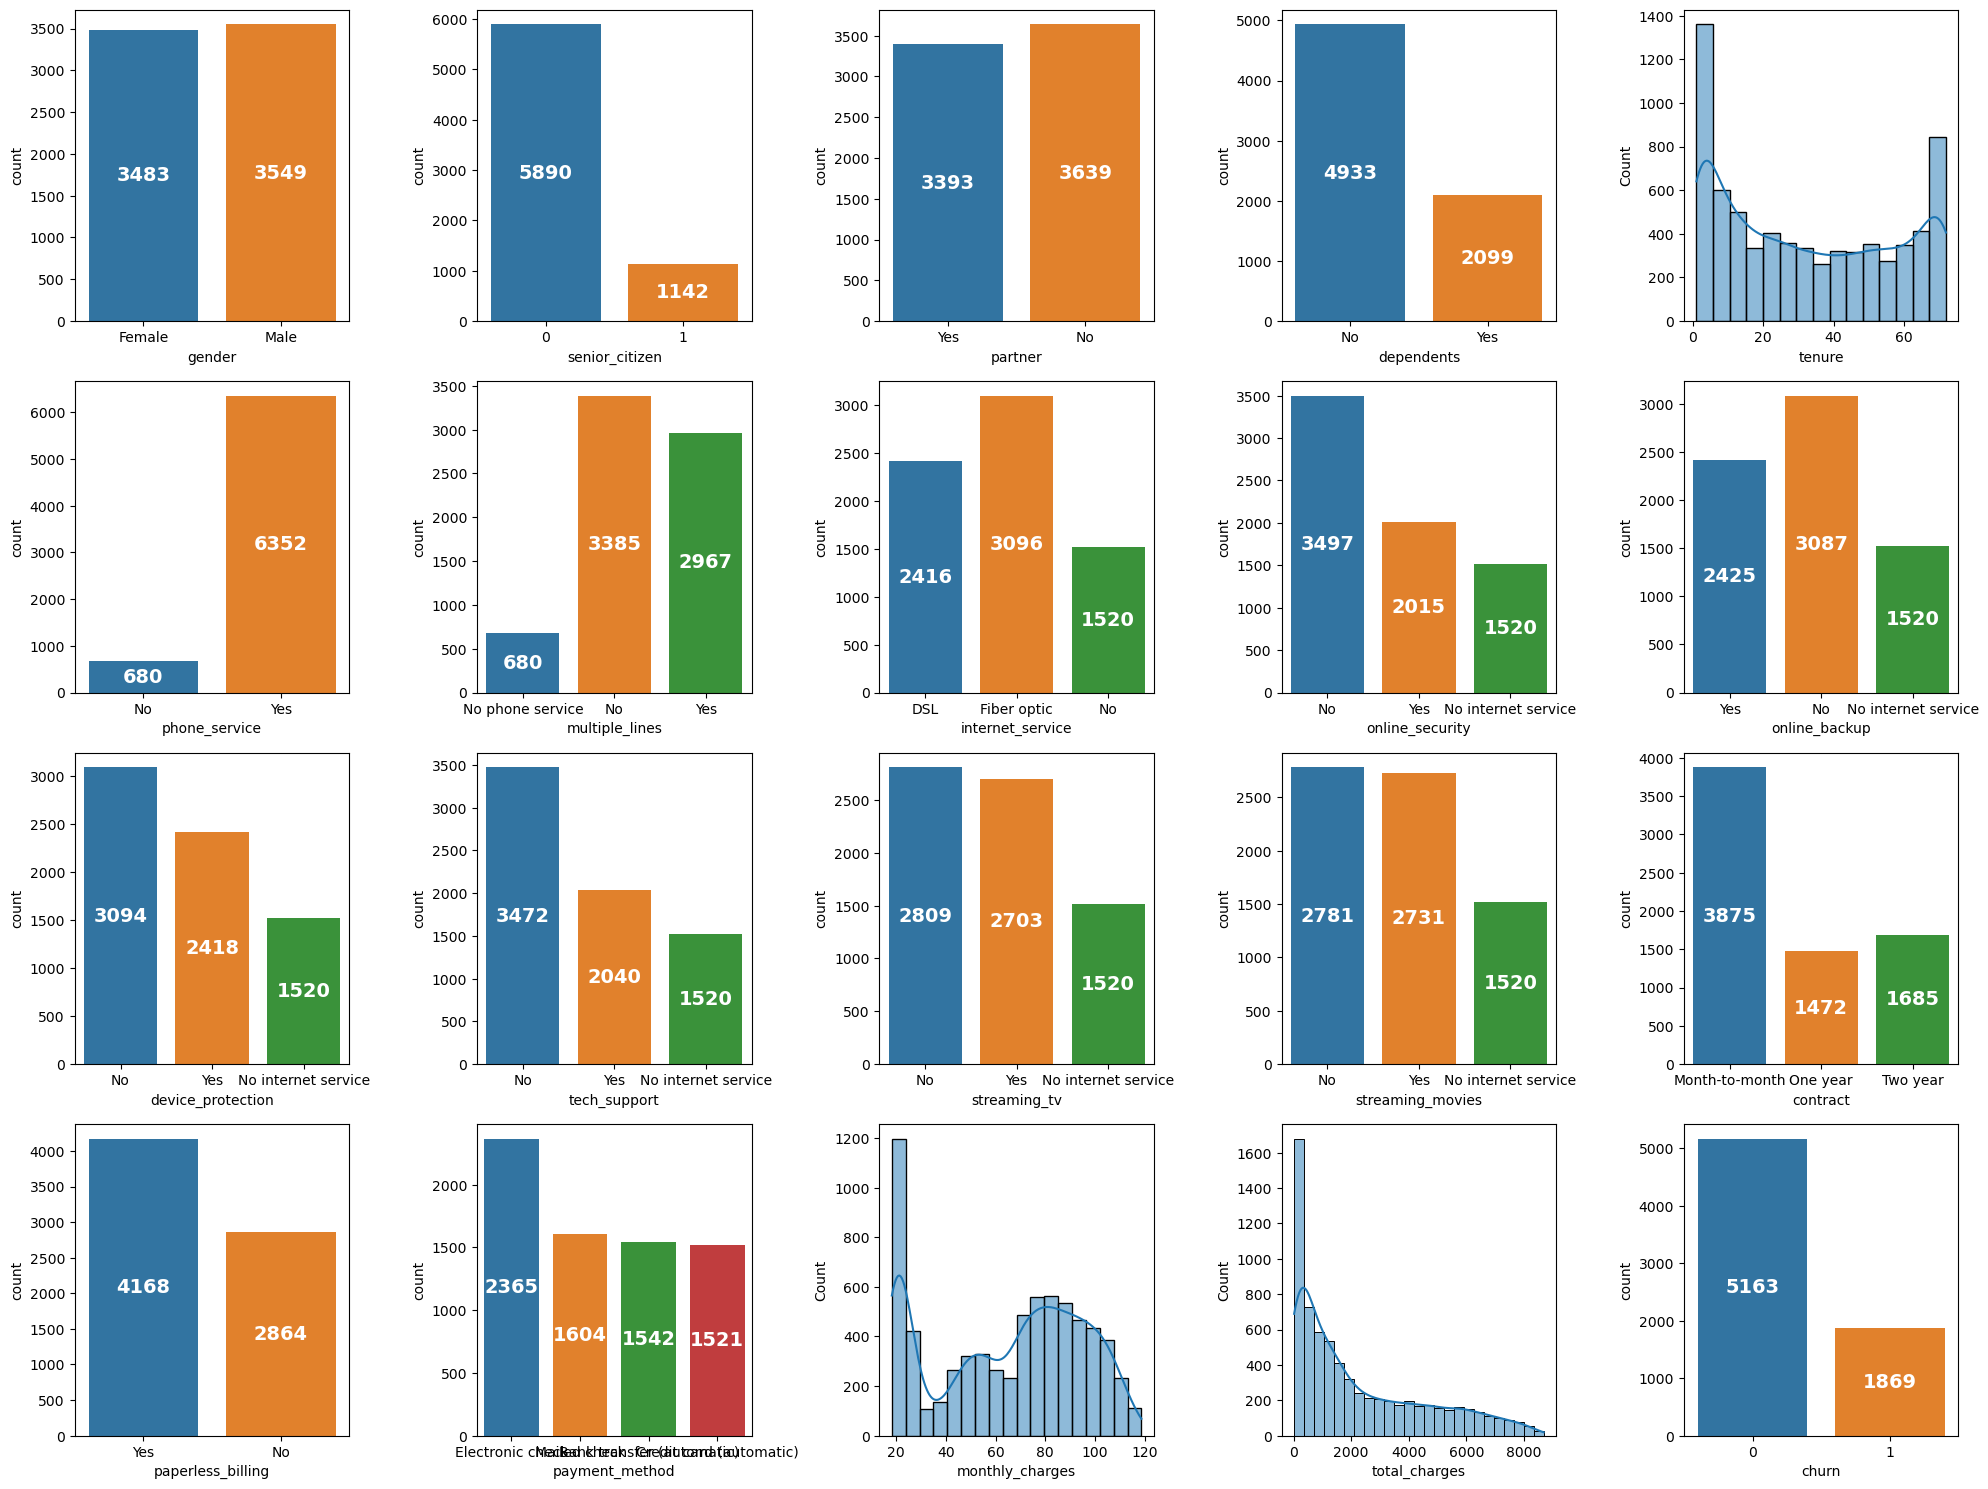

In [210]:
#Check distribution of each columns
cols = telco_custs_vars.columns.values
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
for idx, col in enumerate(cols):
    row = idx // 5
    col_idx = idx % 5
    if telco_custs_vars[col].dtype == 'object' or telco_custs_vars[col].nunique() < 10: 
        ax = sns.countplot(x=col, data=telco_custs_vars, ax=axes[row, col_idx])
        annotate_bars(ax, format='{:.0f}')
    else: 
        sns.histplot(telco_custs_vars[col], kde=True, ax=axes[row, col_idx])
    
fig.tight_layout()
plt.show()

For numerical features (total_charges, monthly charges, tenure), it looks like there are not outliers but the distribution is right skew. Majority of categorical features are quite balanced

<AxesSubplot:>

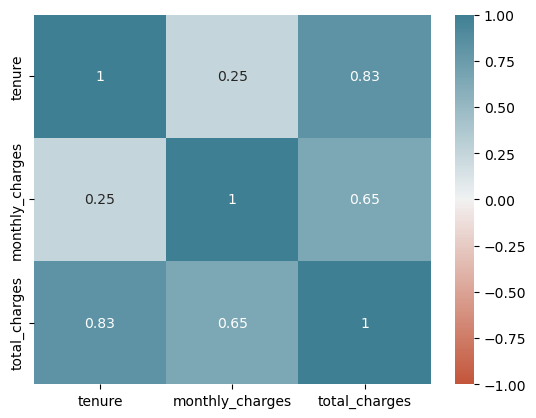

In [211]:
#Check for multi- collinearity 
sns.heatmap(data=telco_custs_vars[['tenure', 'monthly_charges', 'total_charges']].corr(), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(20, 220, as_cmap=True))

Tenure and total_charges have high correlation. A hypothesis is lock-in effect - as people use more services (thus higher charges), they tend to stay with the provider longer

In [212]:
#Encode nominal variables to indicator variables 
telco_custs_dummies = pd.get_dummies(telco_custs_vars)
telco_custs_dummies.head(2)

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1


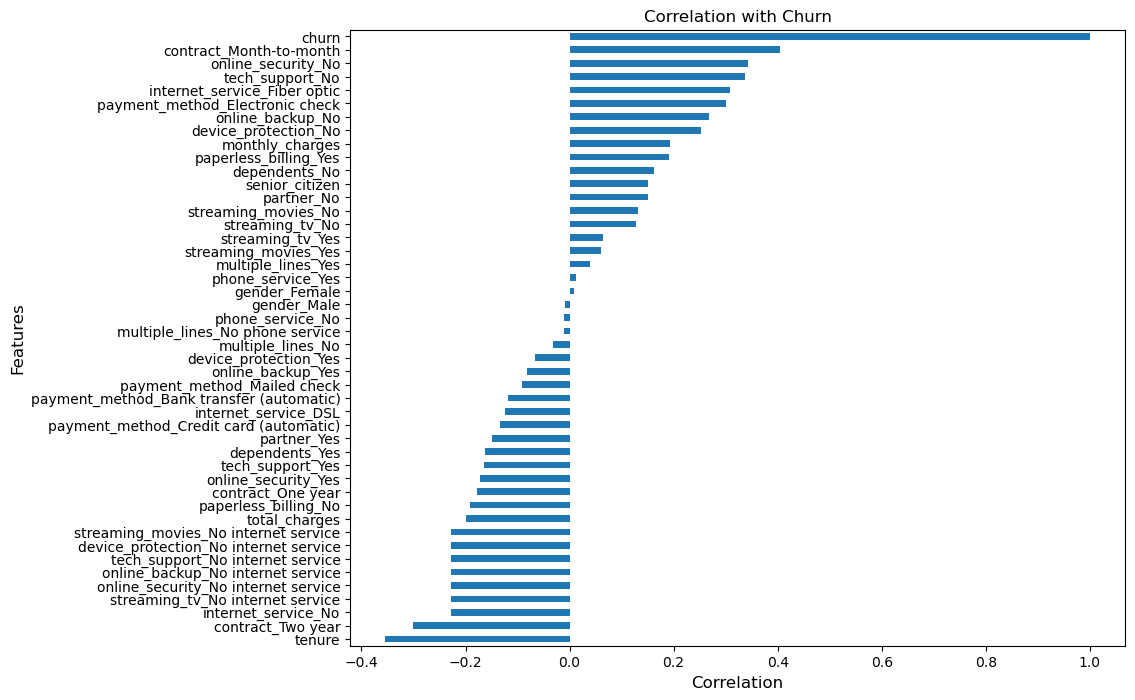

In [213]:
#Get correlation of churn with other variables
plt.figure(figsize=(10,8))
ax = telco_custs_dummies.corr()['churn'].sort_values(ascending=True).plot(kind='barh')
set_labels(ax, 'Correlation', 'Features', 'Correlation with Churn')

It can be seen that Month-to-month contract, absence of online security and tech support seem to have correlation with churn. Customers that do not use internet services for streaming movies/TV, device protection, tech support, online backup and online security churn the least. Probably because there are competitors have better offers / prices for these services. We will explore the pattern for the above correlations before we delve into modelling and identifying the important variables

## 2. Demographics 
understand the gender, age range, partner and dependent status of the customers

### 2.1 Gender and Senior 
* __How many % of the customers are female / male?__
* __If the majority of customer population is senior or not senior (young) population?__ 

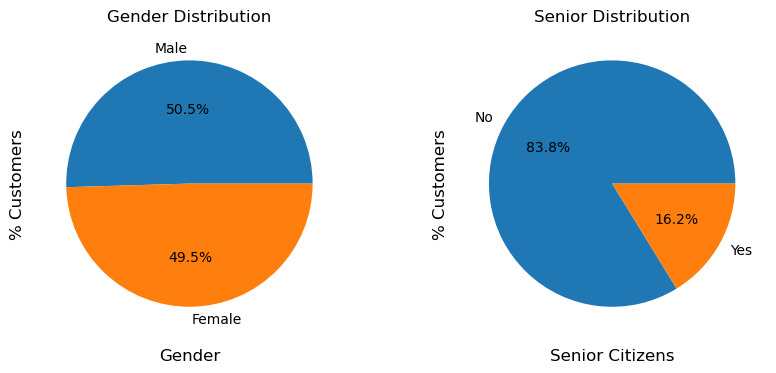

In [214]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gender_per = (telco_custs['gender'].value_counts()*100.0 / len(telco_custs)).plot(kind='pie', autopct ='%.1f%%', ax=axes[0])
set_labels(gender_per, 'Gender', '% Customers', 'Gender Distribution')


senior_per = (telco_custs['senior_citizen'].value_counts()/len(telco_custs)*100.0).plot(kind='pie', autopct ='%.1f%%', labels=['No', 'Yes'], ax=axes[1])
set_labels(senior_per, 'Senior Citizens', '% Customers', 'Senior Distribution')

* The distribution of genders are quite even. Half of the customers are female and the other half is male
* It shows that only 16%  of the customers are senior citizens and 84% of customers are young people

### 2.2 Partner and Dependents status
As can be seen from above graphs of distributions of "partner" and "dependents" variables, the demographics of telcos customer base is slightly skewed towards individuals without partners. Customers with dependents only account for 30% of the total customer base; these population might concentrate in those with a partner

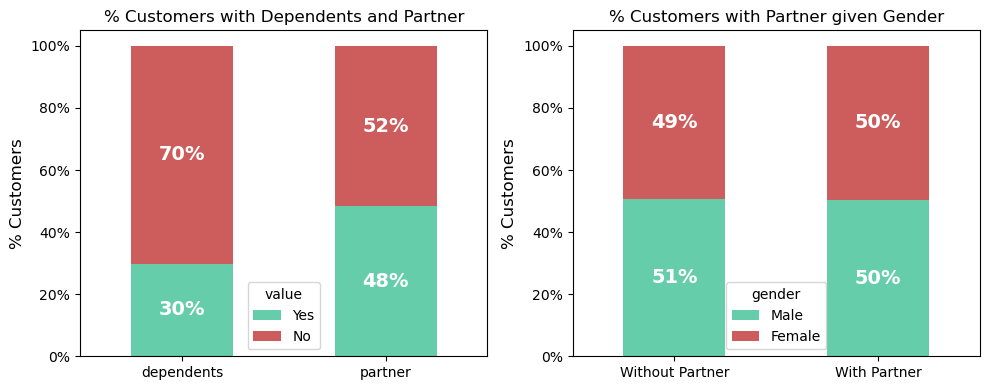

In [208]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#% Customers with dependents and partners
dependents_and_partners = pd.melt(telco_custs, id_vars=['customer_id'], value_vars=['dependents', 'partner'])
dependents_and_partners = dependents_and_partners.groupby(['variable', 'value']).count().unstack()
dependents_and_partners = dependents_and_partners*100 / len(telco_custs)
dependents_and_partners = dependents_and_partners[[('customer_id', 'Yes'), ('customer_id', 'No')]]

colors = ['mediumaquamarine', 'indianred']
ax = dependents_and_partners.loc[:, 'customer_id'].plot(kind='bar', stacked=True, color=colors, rot=0, ax=axes[0])
set_labels(ax, '', '% Customers', '% Customers with Dependents and Partner', percentformat=True)
annotate_bars(ax)

#% Customers with dependents and partners
gender_given_partner = telco_custs.groupby(['gender', 'partner']).size().unstack()
gender_given_partner.rename(columns={'Yes':'With Partner', 'No':'Without Partner'}, inplace=True)
gender_given_partner = gender_given_partner[::-1]

ax = (gender_given_partner*100/gender_given_partner.sum()).T.plot(kind='bar', stacked=True, rot=0, color=colors, ax=axes[1])
set_labels(ax, '', '% Customers', '% Customers with Partner given Gender', percentformat=True)
annotate_bars(ax)

fig.tight_layout()

Only 10% of customers without a partner have dependents while 51% of customers with a partner have depdents. It would be interesting to see what's the with/without dependents ratio based on gender and seniority

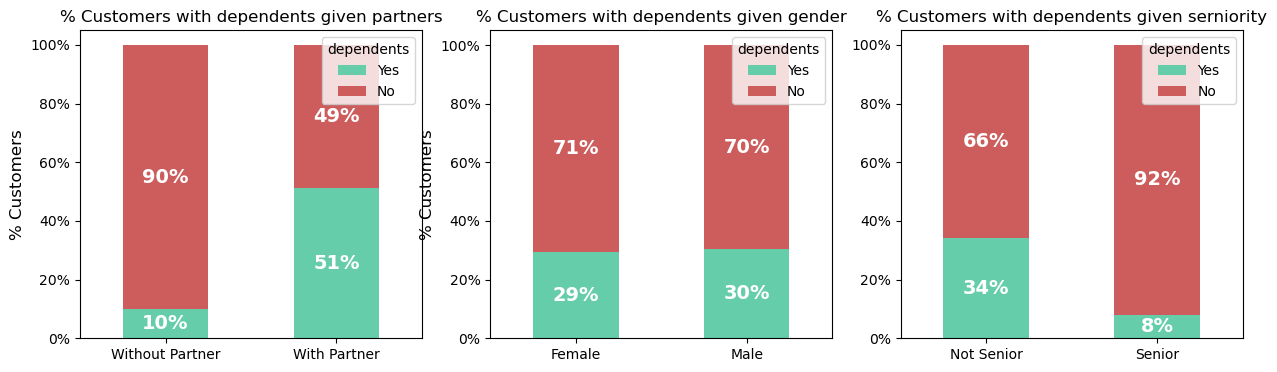

In [202]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

#% Customers with dependents given without/with partners
dependents_given_partner = telco_custs.groupby(['dependents', 'partner']).size().unstack()
dependents_given_partner.rename(columns={'Yes':'With Partner', 'No':'Without Partner'}, inplace=True)
dependents_given_partner = dependents_given_partner[::-1]

ax = (dependents_given_partner*100/dependents_given_partner.sum()).T.plot(kind='bar', stacked=True, rot=0, color=colors, ax=axes[0])
set_labels(ax, '', '% Customers', '% Customers with dependents given partners', percentformat=True)
annotate_bars(ax)

#subplot 1: dependents based on gender
dependents_given_gender = telco_custs.groupby(['dependents', 'gender']).size().unstack()
dependents_given_gender =  dependents_given_gender[::-1]
ax = (dependents_given_gender*100/dependents_given_gender.sum()).T.plot(kind='bar', stacked=True, rot=0,
                                                                   color=colors, ax=axes[1])
set_labels(ax, '', '% Customers', '% Customers with dependents given gender', percentformat=True)
annotate_bars(ax)

#subplot 2: gender based on seniority
senior_given_gender = telco_custs.groupby(['dependents', 'senior_citizen']).size().unstack()
senior_given_gender.rename(columns={0:'Not Senior', 1:'Senior'}, inplace=True)
senior_given_gender = senior_given_gender[::-1]

ax = (senior_given_gender*100/senior_given_gender.sum()).T.plot(kind='bar', stacked=True, rot=0, 
                                                                   color=colors, ax=axes[2])
set_labels(ax, '', '', '% Customers with dependents given seniority', percentformat=True)
annotate_bars(ax)


Judging from the fact that (1) there are equal splits between female-male of customers with partner, (2) there are equal splits of dependent status between female-male customers, (3) 90% of customers without partner do not have dependents, (4) 92% of seniors do not have dependents, we may hypothesize that there's a possible relationship between customers with a partner and those with dependents, suggesting that customers a partner and dependents likely to be family with kids.

### 2.3 Customer Account Information
Next, we look at distribution of tenures, service types and contract type of these customers

#### 2.3.1 Tenure And Contracts



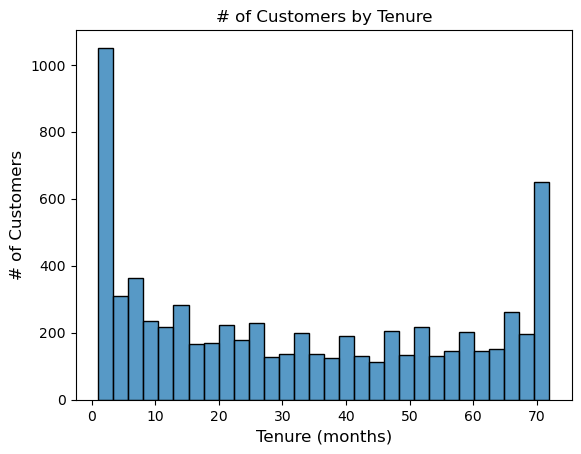

In [23]:
ax = sns.histplot(data=telco_custs, x='tenure', bins=30)
set_labels(ax, 'Tenure (months)', '# of Customers', '# of Customers by Tenure')

It looks like customers tend to either leave the telcos provider within 3 months since sign-up or stay for up to 6 years. One hypothesis is these behaviors are driven by marketing campaigns (customers want to test out the service because of attractive promotions) and/or contracts they sign up for (2-year-contract has great lock-in effect and plenty of room for customer engagement). We can examine the above hypothesis by looking at the distribution of tenure given a type of contract (out of 3 types: 'Month-to-Month', 'One Year', Two-Year')

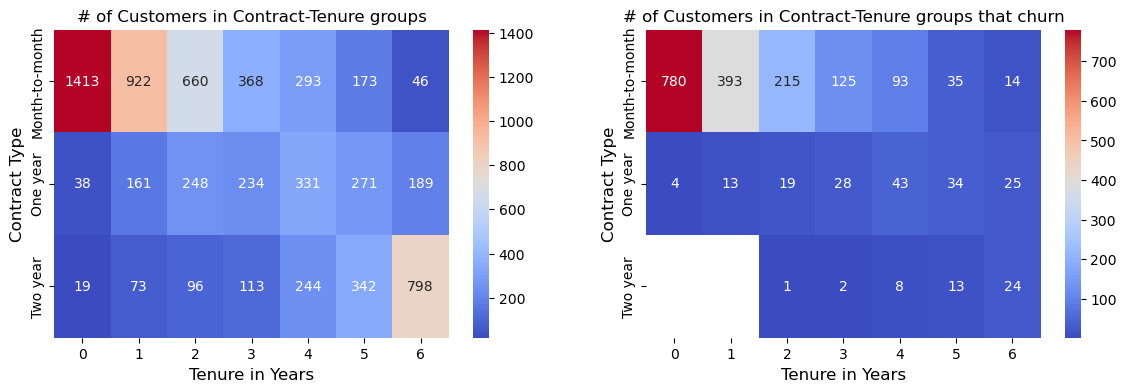

In [237]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

## of Customers in Contract-Tenure groups
telco_custs['tenure_years'] = [int(x) for x in round(telco_custs['tenure']/12)]
contract_and_tenure = telco_custs.groupby(['contract', 'tenure_years']).size().reset_index(name='n_custs')
contract_and_tenure = contract_and_tenure.pivot(index='contract', columns='tenure_years', values='n_custs')

ax = sns.heatmap(contract_and_tenure, annot=True, fmt='d', cmap='coolwarm', ax=axes[0])
set_labels(ax, 'Tenure in Years', 'Contract Type', '# of Customers in Contract-Tenure groups')


## of Customers in Contract-Tenure groups that churn
contract_and_tenure_churn = telco_custs[telco_custs['churn']=='Yes'].groupby(['contract', 'tenure_years']).size().reset_index(name='n_custs')
contract_and_tenure_churn = contract_and_tenure_churn.pivot(index='contract', columns='tenure_years', values='n_custs')

ax = sns.heatmap(contract_and_tenure_churn, annot=True, fmt='.0f', cmap='coolwarm', ax=axes[1])
set_labels(ax, 'Tenure in Years', 'Contract Type', '# of Customers in Contract-Tenure groups that churn')



Majority of month-to-month contract within has less than 1 year of tenure (which can be because of churn or because of date of data collection) and this type of contract also accounts for the largest churns, which aligns as what we've observed with the correlation between churn rate and month-to-month contract earlier. 

In [256]:
proportion_month_to_month_churns = len(telco_custs[(telco_custs['contract']=='Month-to-month') & (telco_custs['churn']=='Yes') & (telco_custs['tenure'] < 12)]) / len(telco_custs[telco_custs.churn=='Yes']) * 100
print("The proportion of customers who have month-to-month contract account for {:.0f}% of total churns".format(proportion_month_to_month_churns))


The proportion of customers who have month-to-month contract account for 53% of total churns


Let's break down the churn of this type of contract by months

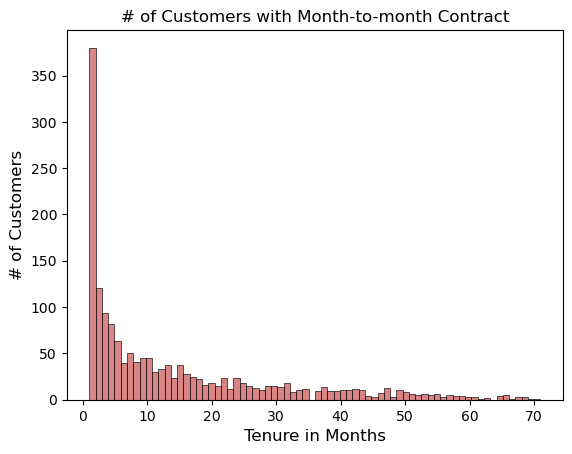

In [257]:
ax = sns.histplot(data = telco_custs.loc[(telco_custs['contract']=='Month-to-month') & (telco_custs['churn']=='Yes'), 'tenure'], 
                bins=max(telco_custs['tenure']), 
                color='indianred'
)
set_labels(ax, 'Tenure in Months', '# of Customers', '# of Customers with Month-to-month Contract')

The distribution is highly positive skew. More than 63% of the churns with monthly contracts happen within the first 2 months. Next, we shall investigate if there are specific services associated with this type of contract that also drives the fast churn.

#### 2.3.3 Services
* There are 2 main services (Phone Service and Internet Service) and within each service, there are sub-service(s)
* The sub-services for phone service is 'multiple_lines' and subservices for internet service are 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'


In [27]:
telco_custs.columns.values

array(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection',
       'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'churn', 'tenure_years'], dtype=object)

In [28]:
main_services = ['phone_service', 'internet_service']
internet_subservices = ['online_security', 'online_backup', 'device_protection',
            'tech_support', 'streaming_tv', 'streaming_movies']

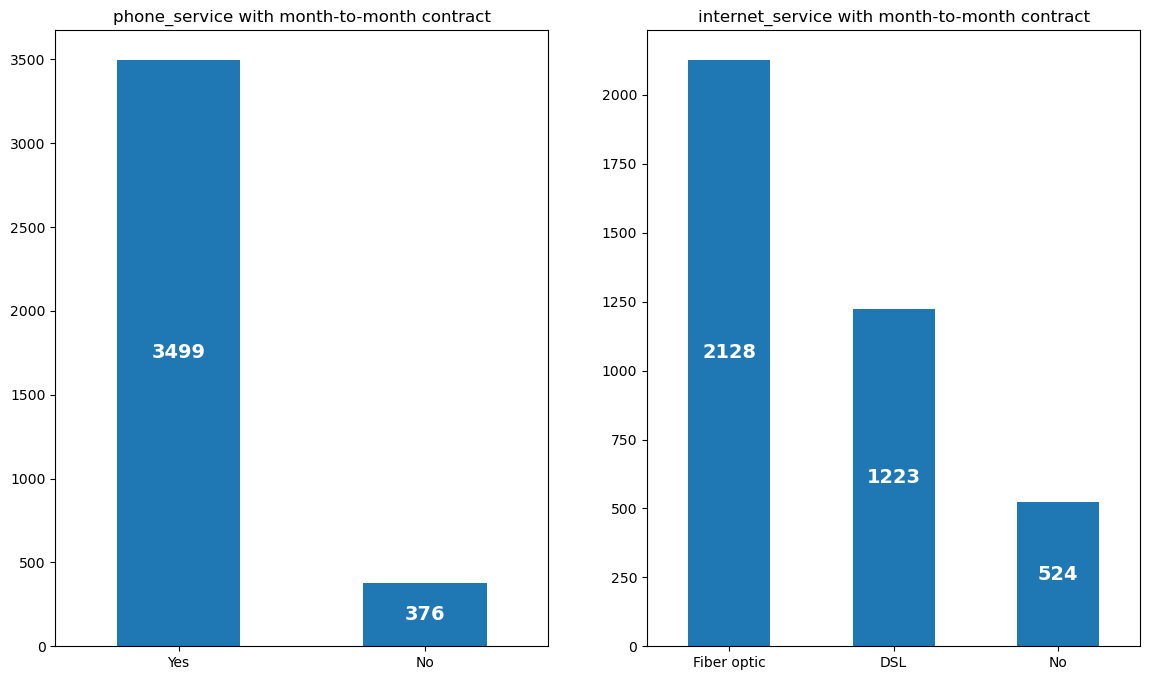

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
for i, service in enumerate(main_services):
    ax = (telco_custs.loc[telco_custs['contract']=='Month-to-month', service].value_counts()).plot(
                                                                    kind='bar', ax=axes[i], rot=0)
    ax.set_title(service + " with month-to-month contract")
    annotate_bars(ax, format='{:.0f}')


Fiber optic in month-to-month contract is high, and it has high correlation to churn. This pattern might be attributed to the lack of lock-in effect and dissatisfaction from customers resulting from low registration for subservices of this internet service. Let's investigate the subscription to subservices under fiber optic

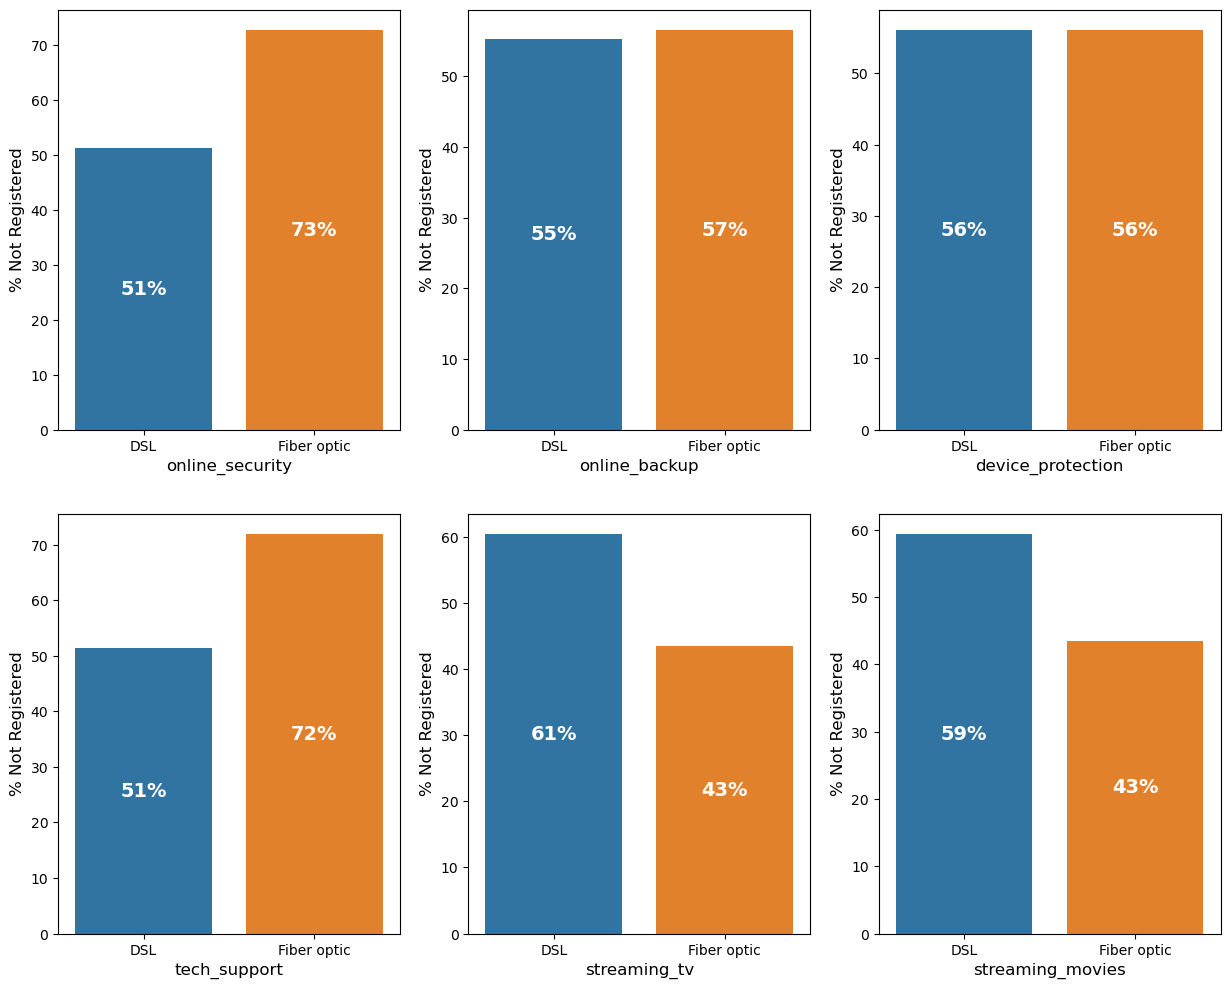

In [296]:
#colors_mapping = {'No': 'indianred', 'Yes':'mediumaquamarine'}
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
for i, subservice in enumerate(internet_subservices):
    row = i // 3
    col_idx = i % 3
    perc_not_register = (telco_custs[telco_custs[subservice] == 'No'].groupby(['internet_service', subservice]).size() /
                         telco_custs.groupby('internet_service').size() * 100).reset_index(name=f'perc_not_register')
    ax = sns.barplot(x='internet_service', y='perc_not_register', data=perc_not_register, ax=axes[row, col_idx])
    set_labels(ax, subservice, '% Not Registered', '')
    annotate_bars(ax)


The graph show that out of customers who use internet service, the percentage of people using Fiber Optic and did not sign up for online security and tech support is 50% larger than percentage of people using DSL and did not sign up for the same sub-services. One hypothesis can be these lack of subservices may induce churn

#### 2.3.4 Monthly and Total Charges

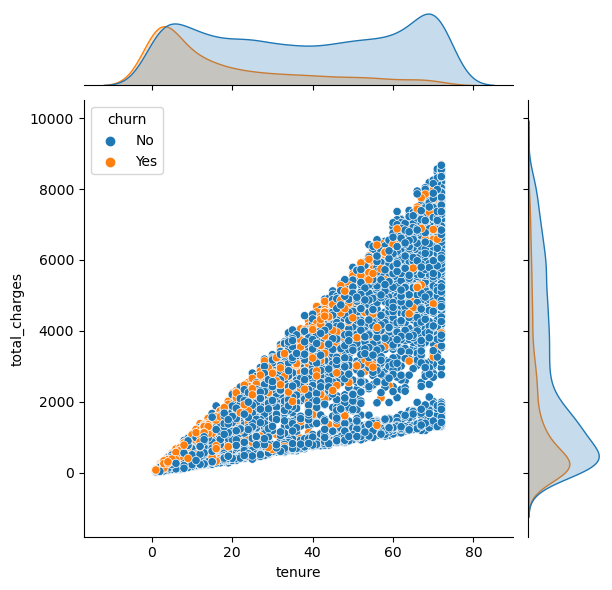

In [305]:
sns.jointplot(data=telco_custs, x='tenure', y='total_charges', kind='scatter', hue='churn')

Total charges increase as tenures increase as expected; however, there are a considerable volume of high tenure and low total charges value who do not churn as much as those are charged more over the same tenure

In [359]:
telco_custs.groupby('internet_service').agg(avg_monthly_charges=('monthly_charges', 'mean')).reset_index()

,internet_service,avg_monthly_charges
0,DSL,58.088017
1,Fiber optic,91.500129
2,No,21.076283


Fiber optic services is significant more expensive than DSL services

## 3. Relationships among Churn and Variables
Main questions are (1) what is the overall churn rate look like? (2) what are the churn distributions in key variables (variables that have high correlation wo churn)? 

### 3.1 Overall Churn

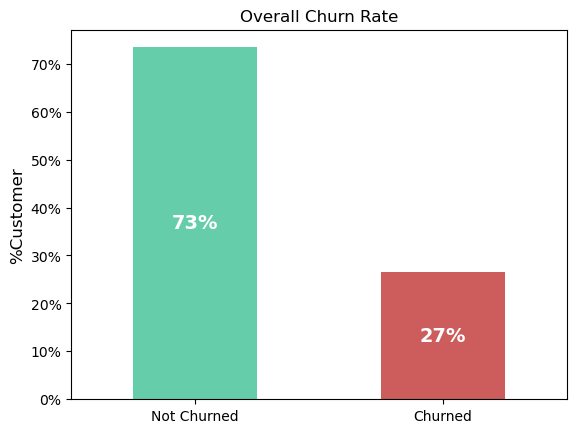

In [32]:
ax = (pd.Series(['Churned' if x == 'Yes' else 'Not Churned' for x in telco_custs['churn']]).value_counts()
                    *100.0/len(telco_custs)).plot(kind='bar', rot=0, color=['mediumaquamarine', 'indianred'])
set_labels(ax, '', '%Customer', 'Overall Churn Rate', percentformat=True)
annotate_bars(ax)

In our data, 73% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives (actually not churn but predicted churn). We will see in the modelling section on how to avoid skewness in the data.

In [33]:
type(telco_custs['churn'])

pandas.core.series.Series

### 3.2 Churn by Tenure

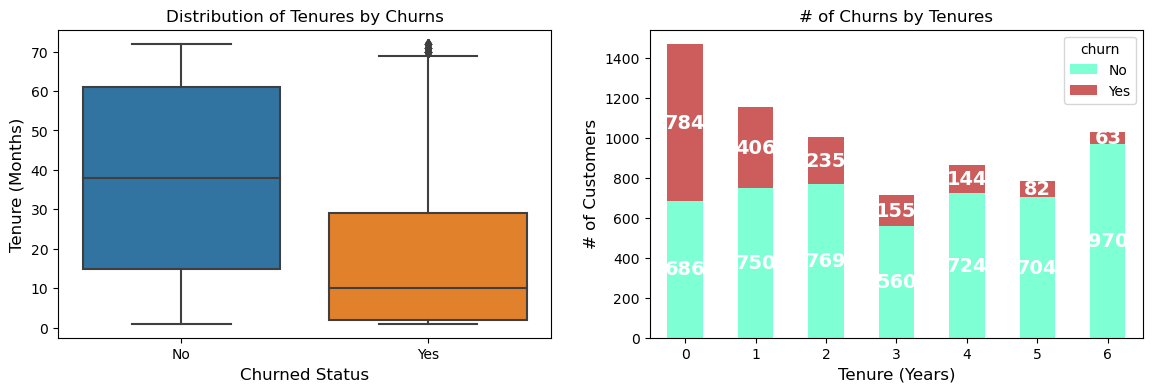

In [310]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

ax = sns.boxplot(data=telco_custs, x='churn', y='tenure', ax=axes[0])
set_labels(ax, 'Churned Status', 'Tenure (Months)', 'Distribution of Tenures by Churns')

churn_percentages= telco_custs.groupby(['tenure_years', 'churn']).size().unstack()
ax = churn_percentages.plot(kind='bar', stacked=True, color=['aquamarine', 'indianred'], rot=0, ax=axes[1])
set_labels(ax, 'Tenure (Years)', '# of Customers', '# of Churns by Tenures')
annotate_bars(ax, format='{:.0f}')

It can be seen that people who stay longer with the company churn less

### 3.3 Churn by Contract Type
month-to-month churn rate is superior as what's shown in the relationship of month-to-month and tenure

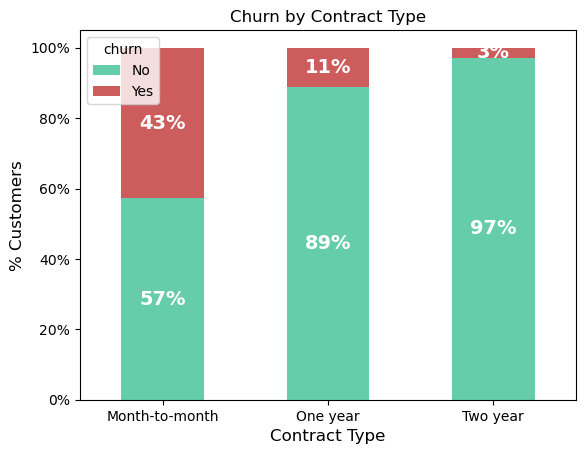

In [37]:
contract_churn = telco_custs.groupby(['contract', 'churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', rot=0, stacked='True', color=colors)
set_labels(ax, 'Contract Type', '% Customers', 'Churn by Contract Type', percentformat=True)
annotate_bars(ax)

### 3.5 Churn by Monthly Charges

In [38]:
churned_monthly_charges = telco_custs[telco_custs['churn']=='Yes']['monthly_charges']
not_churned_monthly_charges = telco_custs[telco_custs['churn']=='No']['monthly_charges']

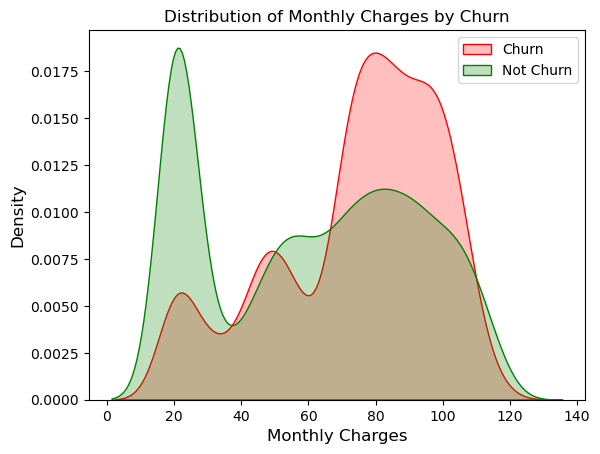

In [39]:
ax = sns.kdeplot(churned_monthly_charges, color= 'Red', shade=True)
ax = sns.kdeplot(not_churned_monthly_charges, color='Green', shade=True)
ax.legend(["Churn","Not Churn"],loc='upper right')
set_labels(ax, 'Monthly Charges', 'Density', 'Distribution of Monthly Charges by Churn')

Customers who churn tend to have higher monthly charges than those who do not

# Predictive Models for Churn
As the last step, we will predict churn using Logistic Regression, Random Forest and SVM and compare them

In [311]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [312]:
telco_custs_dummies.head(2)

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1


## 4.1 Logistic Regression 
For this model we will use the dummies dataframe (where categorical variables are converted to indicaotr variables). As the numerical variables do not follow normal distribution and the rest are binary variables, I'll use MinMaxScaler to scale the numerical variables so they'll take values within range 0 to 1. 

In [313]:
#Separate label and dependent variables 
y = telco_custs_dummies.churn.values 
X = telco_custs_dummies.drop(columns=['churn'])

In [314]:
X.head(2)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [327]:
#Transform X_train and X_test using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [328]:
#Fit a logistic regression model and predict churn
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_predicted = logistic_model.predict(X_test)

Accuracy is 80.8%
Logistic Regression's report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



<AxesSubplot:>

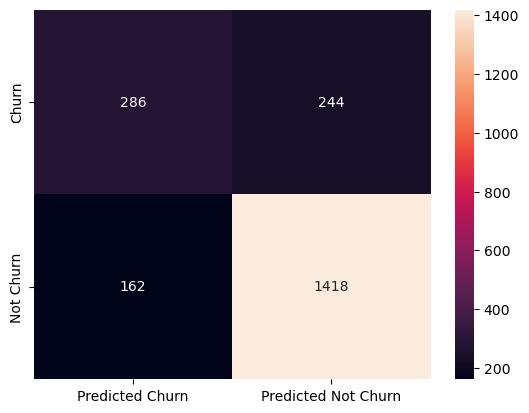

In [340]:
#Report on important metrics
print("Accuracy is " + str(round(metrics.accuracy_score(y_test, y_predicted)*100, 1)) + "%")
print("Logistic Regression's report:")
print(classification_report(y_test, y_predicted))

cm = np.array(confusion_matrix(y_test, y_predicted, labels=[1, 0]))
confusion = pd.DataFrame(cm, index=["Churn", "Not Churn"], columns=["Predicted Churn", "Predicted Not Churn"])
sns.heatmap(confusion, annot=True, fmt="g")

The recall 

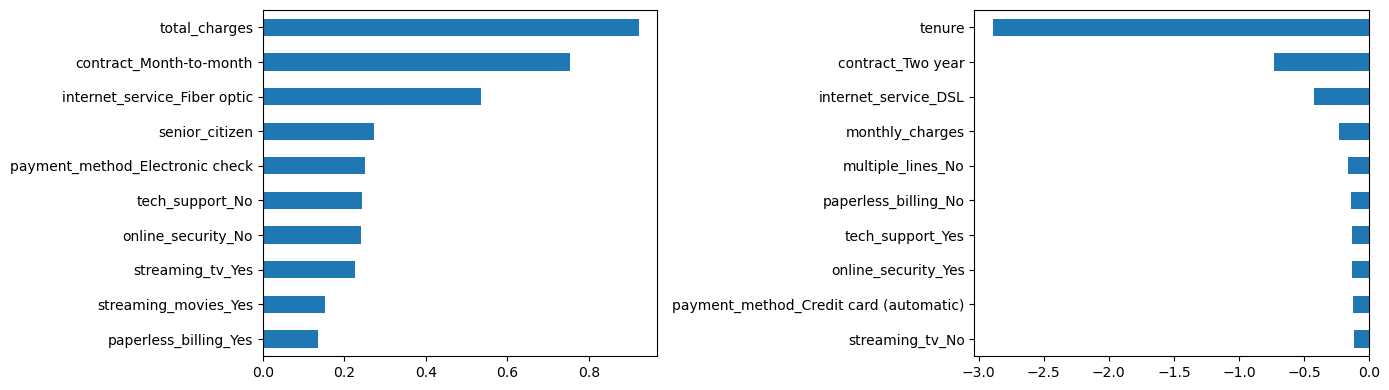

In [357]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
weights = pd.Series(logistic_model.coef_[0], index=X.columns.values)

#Take a look at the main predictors
weights.sort_values(ascending=False)[:10][::-1].plot(kind='barh', ax=axes[0])

#Take a look at variables that are negatively correlated with churn 
weights.sort_values(ascending=False)[-10:].plot(kind='barh', ax=axes[1])
fig.tight_layout()

In summary, as what partially discovered in EDA, there are a few interesting features that positively or negatively correlate with churn: 
* Having a monthly contract and using internet fiber optic increase churns. Customers who use fiber optics may churn because of the lack of online secruity and tech support affect their service satisfaction, and the monthly charges of this service is also higher
* Customers who stay longer and/or sign up for two-year contract tend to churn the least 

## 4.2 Random Forest
for Random Forest

In [369]:
param_grid = {'n_estimators': [100, 200],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [5, 10],
              'min_samples_split': [10, 50],
              'min_samples_leaf': [2, 5]}

rf_model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

rf_model.fit(X_train, y_train)
print("Best parameters: {}".format(rf_model.best_params_))

y_predicted = rf_model.predict(X_test)

print("GridSearchCV's report:")
print(classification_report(y_test, y_predicted))

NameError: name 'grid_search' is not defined

<AxesSubplot:>

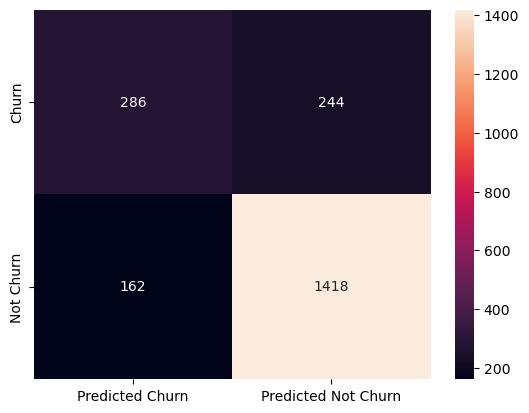

In [360]:
cm = np.array(confusion_matrix(y_test, y_predicted, labels=[1, 0]))
confusion = pd.DataFrame(cm, index=["Churn", "Not Churn"], columns=["Predicted Churn", "Predicted Not Churn"])
sns.heatmap(confusion, annot=True, fmt="g")

## 4.3 Support Vector Machine

In [372]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_predicted = svm_model.predict(X_test)

In [367]:
metrics.accuracy_score(y_test, y_predicted)

0.8014218009478673

In [370]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
adaboost_model.fit(X_train,y_train)
y_predicted = adaboost_model.predict(X_test)
metrics.accuracy_score(y_test, y_predicted)

0.8104265402843602